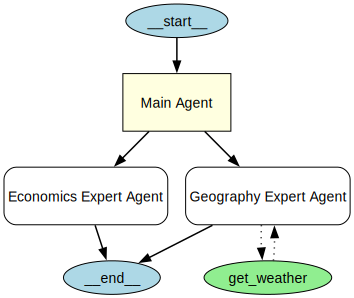

In [25]:
from agents import Agent, Runner, function_tool, SQLiteSession
from agents.extensions.visualization import draw_graph
from pydantic import BaseModel

session = SQLiteSession("user_1", "ai-memory.db")


class Answer(BaseModel):
    answer: str
    background_explanation: str


@function_tool
def get_weather():
    return "30"


geography_agent = Agent(
    name="Geography Expert Agent",
    instructions="You are a expert in geography. you answer questions related to them.",
    handoff_description="Use this to answer geography related questions.",
    tools=[get_weather],
    output_type=Answer,
)

economics_agent = Agent(
    name="Economics Expert Agent",
    instructions="You are a expert in economics. you answer questions related to them.",
    handoff_description="Use this to answer economics questions.",
)

main_agent = Agent(
    name="Main Agent",
    instructions="You are a user facing agent. Transfer to the agent most capable of answering the user's question.",
    handoffs=[economics_agent, geography_agent],
)

draw_graph(main_agent)

In [26]:
result = await Runner.run(
    main_agent,
    "What is the capital of Thailand's northen province?",
    session=session,
)

print(result.last_agent.name)
print(result.final_output)

Geography Expert Agent
answer="The capital of Thailand's northernmost province, Chiang Rai, is the city of Chiang Rai." background_explanation="Thailand's northernmost province is Chiang Rai. The provincial capital is also called Chiang Rai. It is a significant city in the north of Thailand, known for its unique temples, landscapes, and as a starting point for exploring the Golden Triangle region where Thailand, Laos, and Myanmar meet."
